### Simulation of geodesic using einsteinpy

In [1]:
import numpy as np
import astropy.units as u

from plotly.offline import init_notebook_mode

from einsteinpy.plotting import GeodesicPlotter
from einsteinpy.coordinates import SphericalDifferential, BoyerLindquistDifferential
from einsteinpy.bodies import Body
from einsteinpy.geodesic import Geodesic
from einsteinpy.metric.kerrnewman import KerrNewman

init_notebook_mode(connected=True)

#### numba library can be added to optimise the performance of the numpy array during the calculation


/opt/anaconda3/lib/python3.7/site-packages/einsteinpy/ijit.py:31: UserWarning:

Could not import numba package. All einsteinpy functions will work properly but the CPU intensive algorithms will be slow. Consider installing numba to boost performance.



##### User input and initialisation

In [2]:
# Example: Simulating Earth

## Source ##

m = 2e30 # kg

Q = 0   # Charge on the massive body


spin_factor = 0 # spin_factor = J/(Mc) (metres)

## Test Particle ##

q0 = 0   # Charge per unit mass of test particle (check this part)

# initial position cordinates

r = 1.47e11                      # (metres)

theta = np.pi * 0.4999999999                # (radians)

phi = np.pi                      # (radians)

# initial velocity vectors at initial position

Vr = 0                           # (m/s)

Vtheta = 0                       # (rad/s)
 
Vphi = 30.29e3/1.47e11           # (rad/s)



In [3]:
# Source 

Attractor = Body(name="attractor", mass = m * u.kg, R=0 * u.m, differential = None, a = spin_factor * u.m, q = Q * u.C, parent=None)

# Test Object initial position (in spherical coordinates) & initial velocity
sph_obj = BoyerLindquistDifferential(r * u.m, theta * u.rad, phi * u.rad, Vr * u.m/u.s, Vtheta * u.rad/u.s, Vphi * u.rad/u.s, spin_factor * u.m)

####sph_obj = SphericalDifferential(r*u.m, theta*u.rad, phi*u.rad, Vr*u.m/u.s, Vtheta*u.rad/u.s, Vphi*u.rad/u.s)
Object = Body(name="testparticle", mass = 0 * u.kg, R = 0 * u.m,  differential = sph_obj, a = 0 * u.m, q = q0 * (u.C/u.kg), parent=Attractor)

# geodesic simulation
# body = Test particle for which geodesics is to be calculated
# time = time of start
# end_lamda = Lambda(proper time in seconds) where iterations will stop
# step_size = Size of each increment in proper time

geodesic = Geodesic(body = Object, time=0 * u.s, end_lambda= ((1 * u.year).to(u.s)).value, step_size=((50 * u.min).to(u.s)).value, metric=KerrNewman)

#### Plotting the trajectory of test particle in x-y plane

In [4]:
obj = GeodesicPlotter()
obj.plot(geodesic)
obj.show()

#### Plotting the trajectory of test particle in 3-D space

<IPython.core.display.Javascript object>


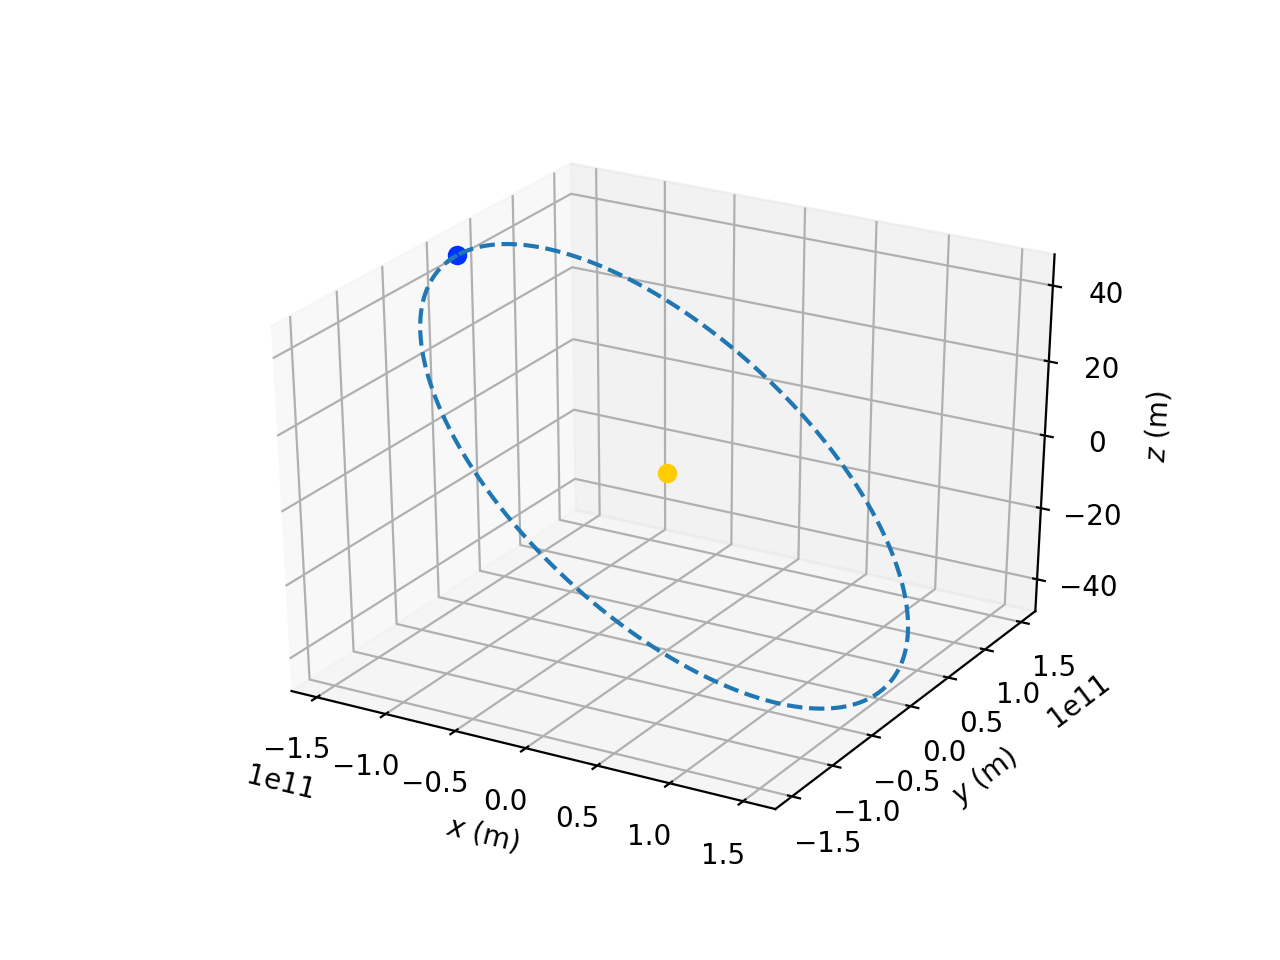

In [5]:

import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
%matplotlib notebook
vals = geodesic.trajectory
x = np.array(vals[:, 1])
y = np.array(vals[:, 2])
z = np.array(vals[:, 3])

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.set_zlabel("$z$ (m)")
ax.set_xlabel("$x$ (m)")
ax.set_ylabel("$y$ (m)")
ax.plot3D([x[0]], [y[0]], [z[0]], "o", color="#0033ff")
ax.plot3D([0], [0], [0], "o", color="#ffcc00")
ax.plot3D(x, y, z, "--")

plt.show()


#### Animation of the trajectory of the test particle

<IPython.core.display.Javascript object>


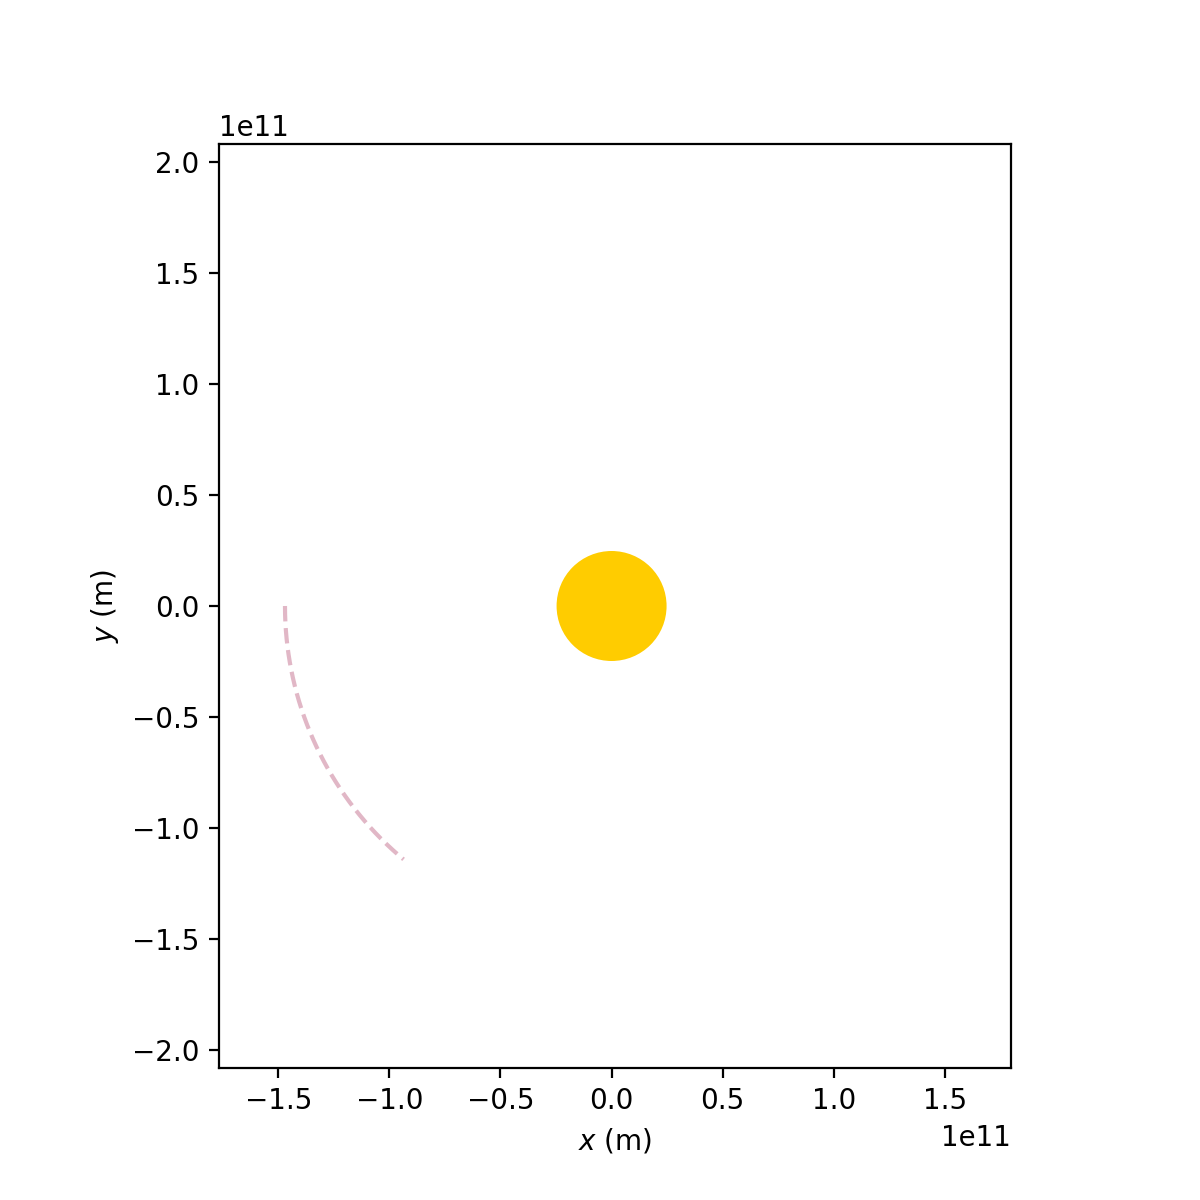

In [6]:
from einsteinpy.plotting import StaticGeodesicPlotter
%matplotlib notebook
obj = StaticGeodesicPlotter()
obj.animate(geodesic, interval=1)
obj.show()